In [1]:
# library
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
# sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load data
Gear degradation occur gradually over time, so we use one datapoint every 10 minutes in the following analysis.

In [2]:
# use the data from the 2nd Gear failure test
data_dir = '2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

2004.02.12.10.32.39
2004.02.12.10.42.39
2004.02.12.10.52.39
2004.02.12.11.02.39
2004.02.12.11.12.39
2004.02.12.11.22.39
2004.02.12.11.32.39
2004.02.12.11.42.39
2004.02.12.11.52.39
2004.02.12.12.02.39
2004.02.12.12.12.39
2004.02.12.12.22.39
2004.02.12.12.32.39
2004.02.12.12.42.39
2004.02.12.12.52.39
2004.02.12.13.02.39
2004.02.12.13.12.39
2004.02.12.13.22.39
2004.02.12.13.32.39
2004.02.12.13.42.39
2004.02.12.13.52.39
2004.02.12.14.02.39
2004.02.12.14.12.39
2004.02.12.14.22.39
2004.02.12.14.32.39
2004.02.12.14.42.39
2004.02.12.14.52.39
2004.02.12.15.02.39
2004.02.12.15.12.39
2004.02.12.15.22.39
2004.02.12.15.32.39
2004.02.12.15.42.39
2004.02.12.15.52.39
2004.02.12.16.02.39
2004.02.12.16.12.39
2004.02.12.16.22.39
2004.02.12.16.32.39
2004.02.12.16.42.39
2004.02.12.16.52.39
2004.02.12.17.02.39
2004.02.12.17.12.39
2004.02.12.17.22.39
2004.02.12.17.32.39
2004.02.12.17.42.39
2004.02.12.17.52.39
2004.02.12.18.02.39
2004.02.12.18.12.39
2004.02.12.18.22.39
2004.02.12.18.32.39
2004.02.12.18.42.39


2004.02.15.07.02.39
2004.02.15.07.12.39
2004.02.15.07.22.39
2004.02.15.07.32.39
2004.02.15.07.42.39
2004.02.15.07.52.39
2004.02.15.08.02.39
2004.02.15.08.12.39
2004.02.15.08.22.39
2004.02.15.08.32.39
2004.02.15.08.42.39
2004.02.15.08.52.39
2004.02.15.09.02.39
2004.02.15.09.12.39
2004.02.15.09.22.39
2004.02.15.09.32.39
2004.02.15.09.42.39
2004.02.15.09.52.39
2004.02.15.10.02.39
2004.02.15.10.12.39
2004.02.15.10.22.39
2004.02.15.10.32.39
2004.02.15.10.42.39
2004.02.15.10.52.39
2004.02.15.11.02.39
2004.02.15.11.12.39
2004.02.15.11.22.39
2004.02.15.11.32.39
2004.02.15.11.42.39
2004.02.15.11.52.39
2004.02.15.12.02.39
2004.02.15.12.12.39
2004.02.15.12.22.39
2004.02.15.12.32.39
2004.02.15.12.42.39
2004.02.15.12.52.39
2004.02.15.13.02.39
2004.02.15.13.12.39
2004.02.15.13.22.39
2004.02.15.13.32.39
2004.02.15.13.42.39
2004.02.15.13.52.39
2004.02.15.14.02.39
2004.02.15.14.12.39
2004.02.15.14.22.39
2004.02.15.14.32.39
2004.02.15.14.42.39
2004.02.15.14.52.39
2004.02.15.15.02.39
2004.02.15.15.12.39


2004.02.18.03.12.39
2004.02.18.03.22.39
2004.02.18.03.32.39
2004.02.18.03.42.39
2004.02.18.03.52.39
2004.02.18.04.02.39
2004.02.18.04.12.39
2004.02.18.04.22.39
2004.02.18.04.32.39
2004.02.18.04.42.39
2004.02.18.04.52.39
2004.02.18.05.02.39
2004.02.18.05.12.39
2004.02.18.05.22.39
2004.02.18.05.32.39
2004.02.18.05.42.39
2004.02.18.05.52.39
2004.02.18.06.02.39
2004.02.18.06.12.39
2004.02.18.06.22.39
2004.02.18.06.32.39
2004.02.18.06.42.39
2004.02.18.06.52.39
2004.02.18.07.02.39
2004.02.18.07.12.39
2004.02.18.07.22.39
2004.02.18.07.32.39
2004.02.18.07.42.39
2004.02.18.07.52.39
2004.02.18.08.02.39
2004.02.18.08.12.39
2004.02.18.08.22.39
2004.02.18.08.32.39
2004.02.18.08.42.39
2004.02.18.08.52.39
2004.02.18.09.02.39
2004.02.18.09.12.39
2004.02.18.09.22.39
2004.02.18.09.32.39
2004.02.18.09.42.39
2004.02.18.09.52.39
2004.02.18.10.02.39
2004.02.18.10.12.39
2004.02.18.10.22.39
2004.02.18.10.32.39
2004.02.18.10.42.39
2004.02.18.10.52.39
2004.02.18.11.02.39
2004.02.18.11.12.39
2004.02.18.11.22.39


In [3]:
merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

In [4]:
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004.02.12.10.32.39,0.058333,0.071832,0.083242,0.043067
2004.02.12.10.42.39,0.058995,0.074006,0.084435,0.044541
2004.02.12.10.52.39,0.060236,0.074227,0.083926,0.044443
2004.02.12.11.02.39,0.061455,0.073844,0.084457,0.045081
2004.02.12.11.12.39,0.061361,0.075609,0.082837,0.045118


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 2004.02.12.10.32.39 to 2004.02.19.06.22.39
Data columns (total 4 columns):
Bearing 1    984 non-null float64
Bearing 2    984 non-null float64
Bearing 3    984 non-null float64
Bearing 4    984 non-null float64
dtypes: float64(4)
memory usage: 38.4+ KB


In [6]:
# transform the index to datetime format 
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()

In [7]:
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


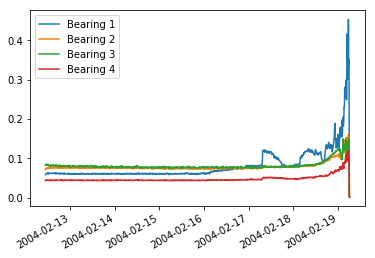

In [8]:
merged_data.plot()
plt.show()

In [9]:
# Split data
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]

dataset_train.shape, dataset_test.shape

((222, 4), (760, 4))

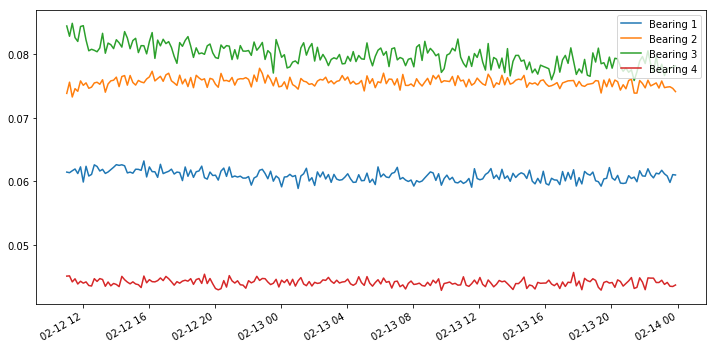

In [10]:
dataset_train.plot(figsize = (12,6))
plt.show()

### Normalize data

In [11]:
# The “MinMaxScaler” simply re-scales the data to be in the range [0,1]
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)

In [12]:
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

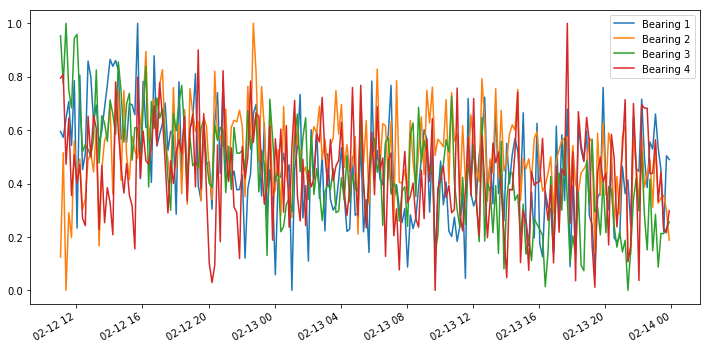

In [13]:
X_train.plot(figsize = (12,6))
plt.show()

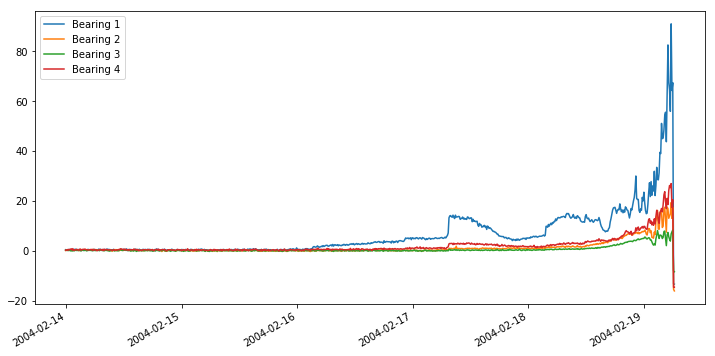

In [14]:
X_test.plot(figsize = (12,6))
plt.show()

### Model

In [15]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [16]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [17]:
# Mahalanobis distance
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [18]:
# Detecting outliers
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [19]:
# Calculate threshold value for classifying datapoint as anomaly:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [20]:
# Check if matrix is positive definite:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [21]:
# Define train/test set from the two main principal components:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [22]:
# Calculate the covariance matrix and its inverse, based on data in the training set:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [23]:
cov_matrix

array([[6.83095186e-02, 7.78663207e-18],
       [7.78663207e-18, 2.73966938e-02]])

In [24]:
inv_cov_matrix

array([[ 1.46392482e+01, -4.16073708e-15],
       [-4.16073708e-15,  3.65007547e+01]])

In [25]:
# calculate the mean value for the input variables in the training set
mean_distr = data_train.mean(axis=0)
mean_distr

array([8.00160738e-18, 1.20024111e-17])

In [26]:
# calculate the Mahalanobis distance for the training data defining “normal conditions”
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

# find the threshold value to flag datapoints as an anomaly.
threshold = MD_threshold(dist_train, extreme = True)

In [27]:
threshold

3.8120454918056756

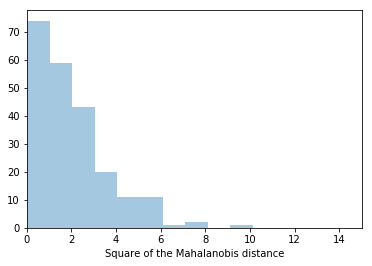

In [28]:
# visualizing the square of the Mahalanobis distance
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])
plt.xlabel('Square of the Mahalanobis distance')
plt.show()

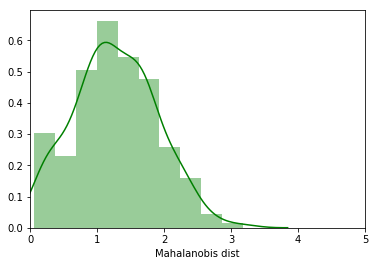

In [29]:
# visualize the Mahalanobis distance itself:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')
plt.show()

The calculated threshold value of 3.8 for flagging an anomaly seems reasonable (defined as 3 standard deviations from the center of the distribution)

### Anomaly detection

In [30]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold

# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [31]:
anomaly_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2004-02-12 11:02:39 to 2004-02-13 23:52:39
Data columns (total 3 columns):
Mob dist    222 non-null float64
Thresh      222 non-null float64
Anomaly     222 non-null bool
dtypes: bool(1), float64(2)
memory usage: 5.4 KB


In [32]:
anomaly_train.Anomaly.value_counts()

False    222
Name: Anomaly, dtype: int64

In [33]:
anomaly_train.head()

,Mob dist,Thresh,Anomaly
2004-02-12 11:02:39,1.667002,3.812045,False
2004-02-12 11:12:39,1.699415,3.812045,False
2004-02-12 11:22:39,2.671968,3.812045,False
2004-02-12 11:32:39,1.424617,3.812045,False
2004-02-12 11:42:39,1.624601,3.812045,False


Based on the calculated statistics, any distance above the threshold value will be flagged as an anomaly.

In [34]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold

# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.032676,3.812045,False
2004-02-14 00:02:39,1.148163,3.812045,False
2004-02-14 00:12:39,1.509998,3.812045,False
2004-02-14 00:22:39,1.849725,3.812045,False
2004-02-14 00:32:39,0.701075,3.812045,False


In [35]:
anomaly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 760 entries, 2004-02-13 23:52:39 to 2004-02-19 06:22:39
Data columns (total 3 columns):
Mob dist    760 non-null float64
Thresh      760 non-null float64
Anomaly     760 non-null bool
dtypes: bool(1), float64(2)
memory usage: 18.6 KB


In [36]:
anomaly.Anomaly.value_counts()

True     409
False    351
Name: Anomaly, dtype: int64

In [37]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
#anomaly_alldata.to_csv('Anomaly_distance.csv')

In [38]:
anomaly_alldata.head(10)

,Mob dist,Thresh,Anomaly
2004-02-12 11:02:39,1.667002,3.812045,False
2004-02-12 11:12:39,1.699415,3.812045,False
2004-02-12 11:22:39,2.671968,3.812045,False
2004-02-12 11:32:39,1.424617,3.812045,False
2004-02-12 11:42:39,1.624601,3.812045,False
2004-02-12 11:52:39,2.644238,3.812045,False
2004-02-12 12:02:39,1.987715,3.812045,False
2004-02-12 12:12:39,1.786536,3.812045,False
2004-02-12 12:22:39,1.319040,3.812045,False
2004-02-12 12:32:39,1.502585,3.812045,False


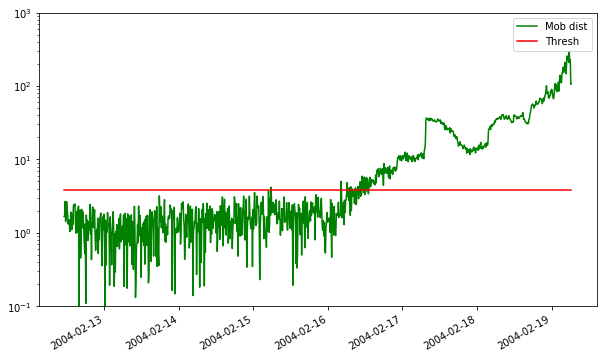

In [39]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])
plt.show()

This model is able to detect the anomaly approximately 3 days ahead of the actual bearing failure.